# Stock Market Analysis and Visualisation

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [10]:
# Load dataset
df = pd.read_csv("C:\\dataSet\\all_stocks_5yr.csv")

# Cleaning and Preprocessing

In [11]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [12]:
df.info

<bound method DataFrame.info of               date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]>

In [13]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [15]:
# Cleaning
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [18]:
df.head()

,date,open,high,low,close,volume,Name,Month,Year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2,2013


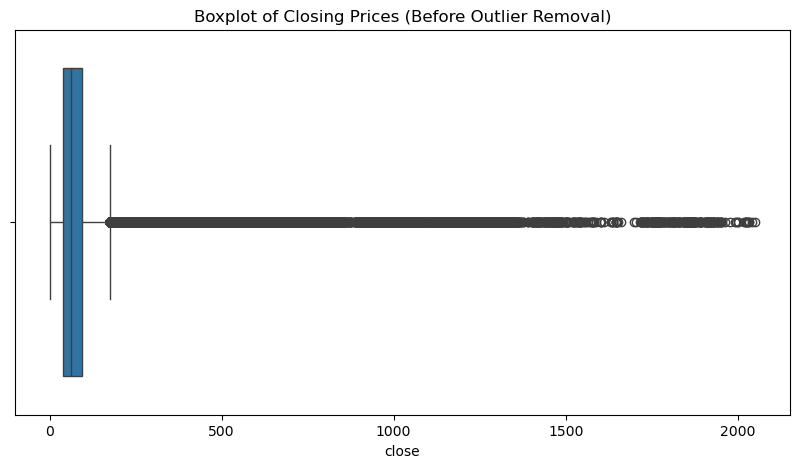

In [19]:
# ---------- Outlier Detection & Removal ----------
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['close'])
plt.title("Boxplot of Closing Prices (Before Outlier Removal)")
plt.show()

In [20]:
# Remove outliers using IQR
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['close'] < (Q1 - 1.5 * IQR)) | (df['close'] > (Q3 + 1.5 * IQR)))]

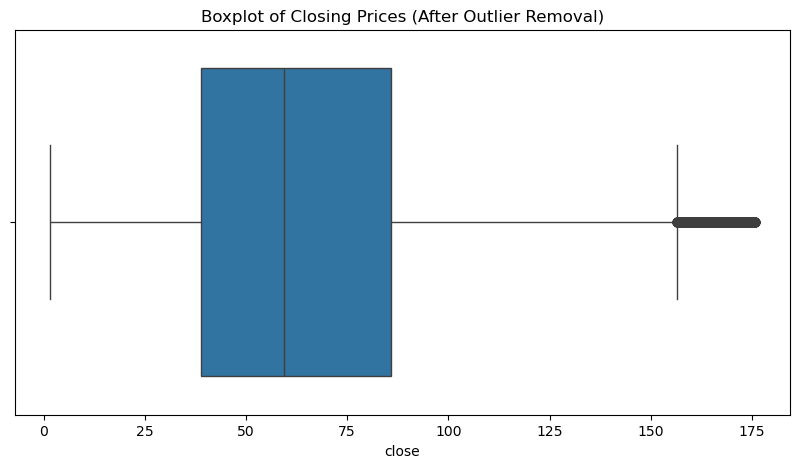

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['close'])
plt.title("Boxplot of Closing Prices (After Outlier Removal)")
plt.show()

# Visualisation of Data

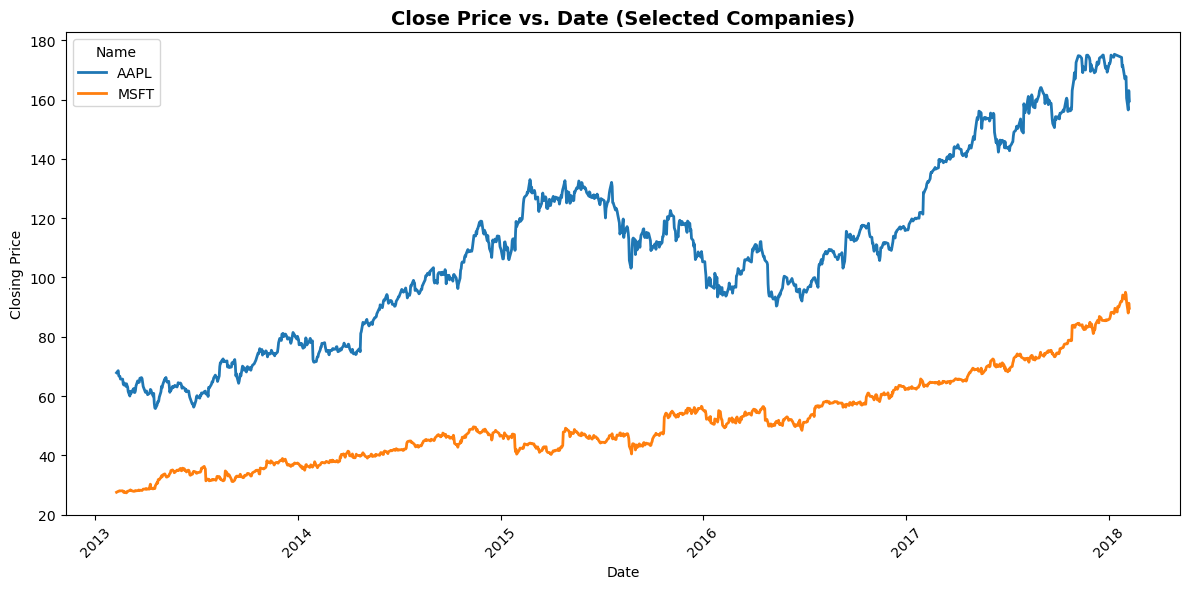

In [22]:
# --- 1. Combined Close Price Line Plot ---
selected_companies = ['AAPL', 'MSFT']
df_selected = df[df['Name'].isin(selected_companies)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='date', y='close', hue='Name', linewidth=2)
plt.title('Close Price vs. Date (Selected Companies)', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

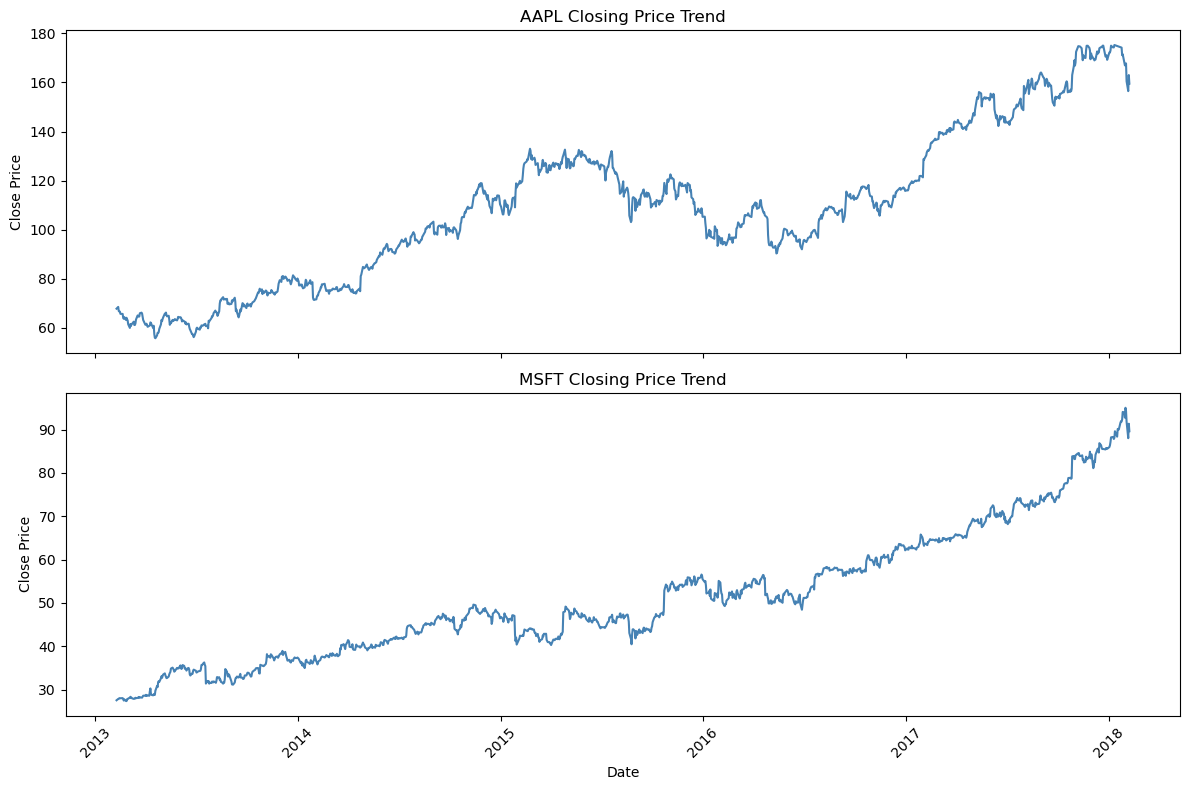

In [23]:
# --- 2. Subplots for Each Company ---
fig, axes = plt.subplots(nrows=len(selected_companies), ncols=1, figsize=(12, 4*len(selected_companies)), sharex=True)

for ax, company in zip(axes, selected_companies):
    company_data = df_selected[df_selected['Name'] == company]
    sns.lineplot(data=company_data, x='date', y='close', ax=ax, color='steelblue')
    ax.set_title(f'{company} Closing Price Trend')
    ax.set_ylabel('Close Price')
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

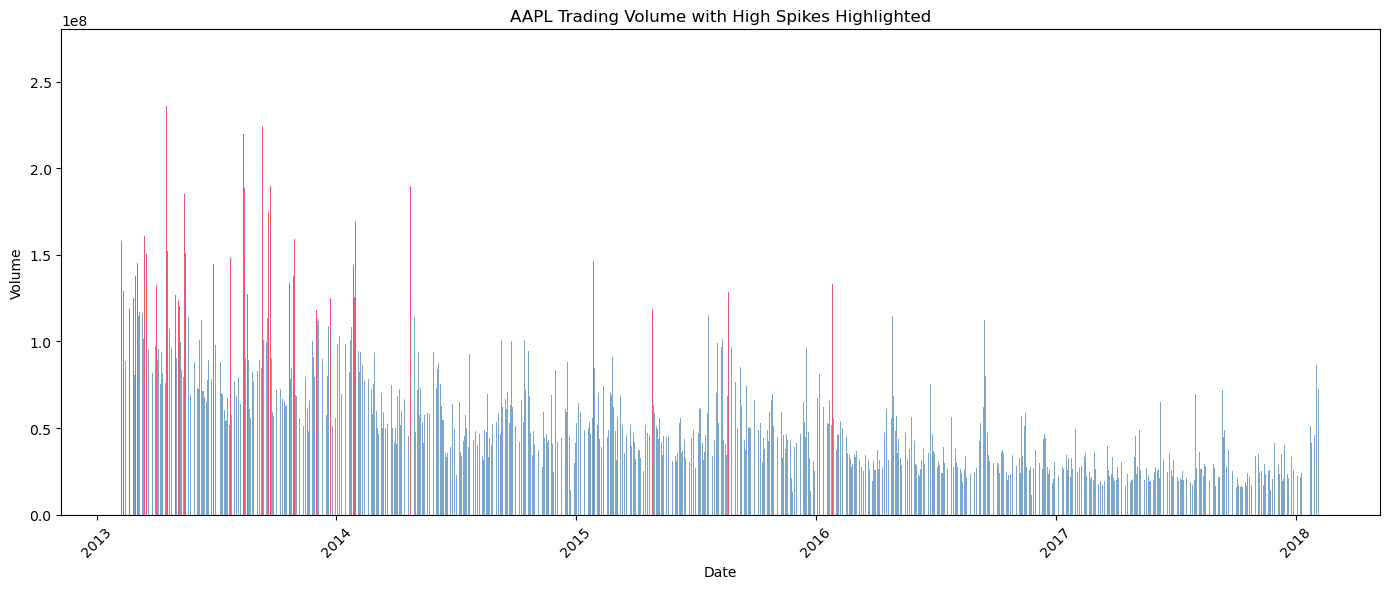

In [24]:
# --- 3. Trading Volume with Spikes ---
company = 'AAPL'  # Example
df_company = df[df['Name'] == company].copy()
df_company.sort_values('date', inplace=True)

threshold = df_company['volume'].quantile(0.95)
df_company['spike'] = df_company['volume'] > threshold

plt.figure(figsize=(14, 6))
colors = ['crimson' if spike else 'steelblue' for spike in df_company['spike']]
plt.bar(df_company['date'], df_company['volume'], color=colors, alpha=0.7)
plt.title(f'{company} Trading Volume with High Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

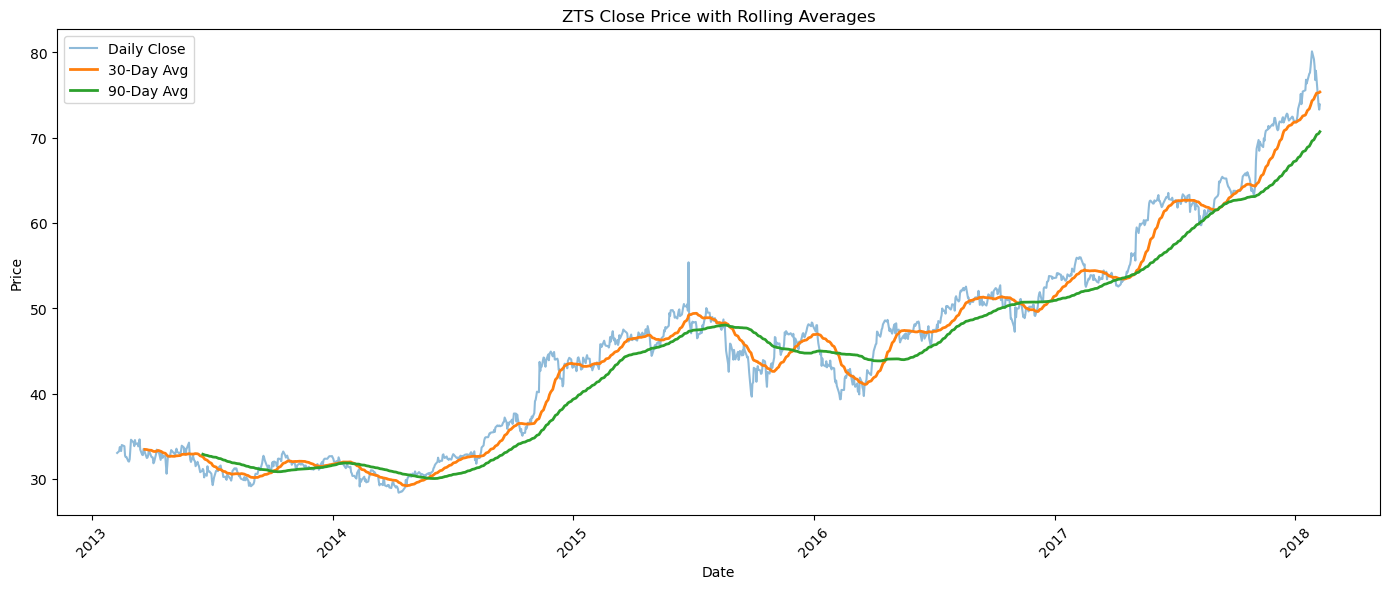

In [25]:
# --- 4. Rolling Averages ---
company = 'ZTS'
df_company = df[df['Name'] == company].copy()
df_company.sort_values('date', inplace=True)

df_company['30_day_avg'] = df_company['close'].rolling(window=30).mean()
df_company['90_day_avg'] = df_company['close'].rolling(window=90).mean()

plt.figure(figsize=(14, 6))
plt.plot(df_company['date'], df_company['close'], label='Daily Close', alpha=0.5)
plt.plot(df_company['date'], df_company['30_day_avg'], label='30-Day Avg', linewidth=2)
plt.plot(df_company['date'], df_company['90_day_avg'], label='90-Day Avg', linewidth=2)
plt.title(f'{company} Close Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\navya\AppData\Local\Temp\ipykernel_31728\3737281857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='close', data=df, palette='viridis')


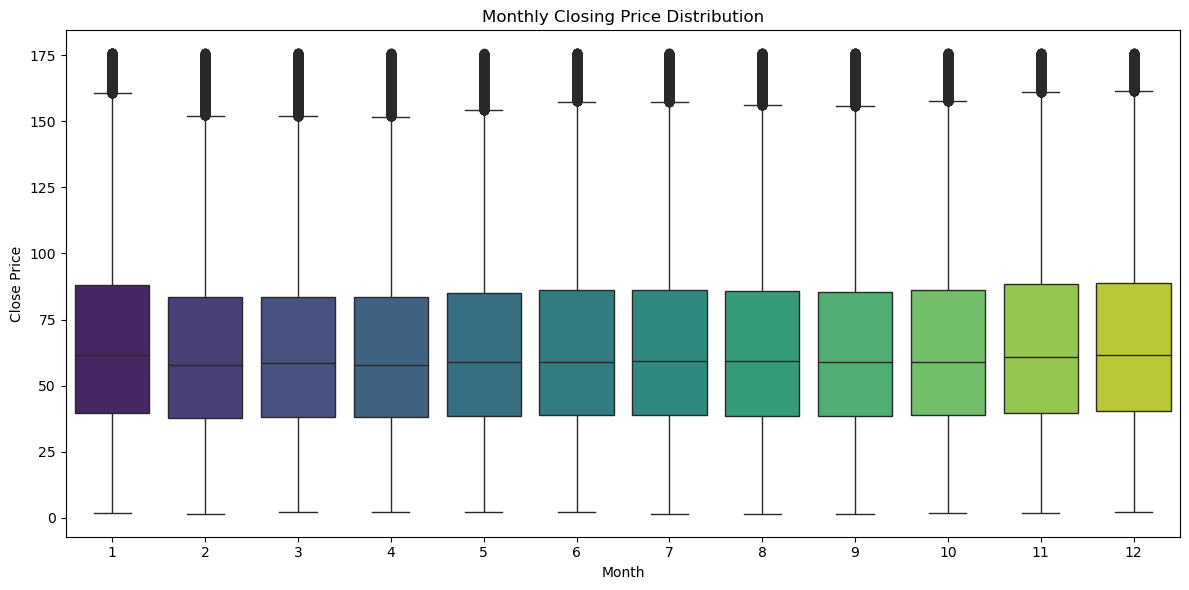

In [26]:
# --- 5. Monthly Distribution (Boxplot) ---
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='close', data=df, palette='viridis')
plt.title('Monthly Closing Price Distribution')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

C:\Users\navya\AppData\Local\Temp\ipykernel_31728\1448082125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='close', data=df, palette='plasma')


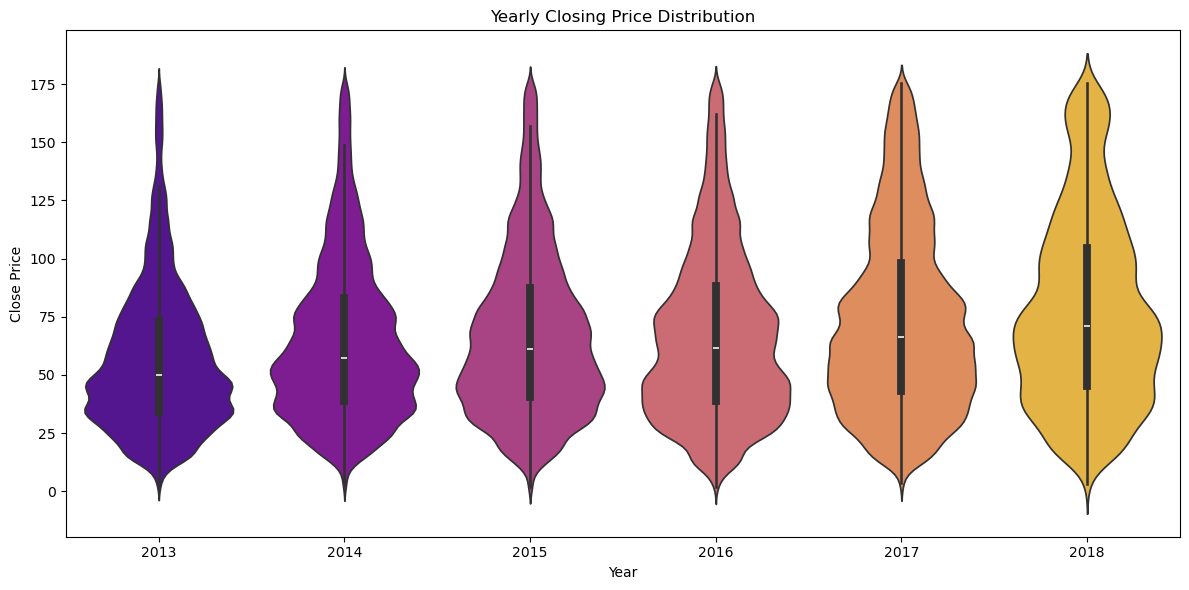

In [27]:
# --- 6. Yearly Distribution (Violin Plot) ---
plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='close', data=df, palette='plasma')
plt.title('Yearly Closing Price Distribution')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

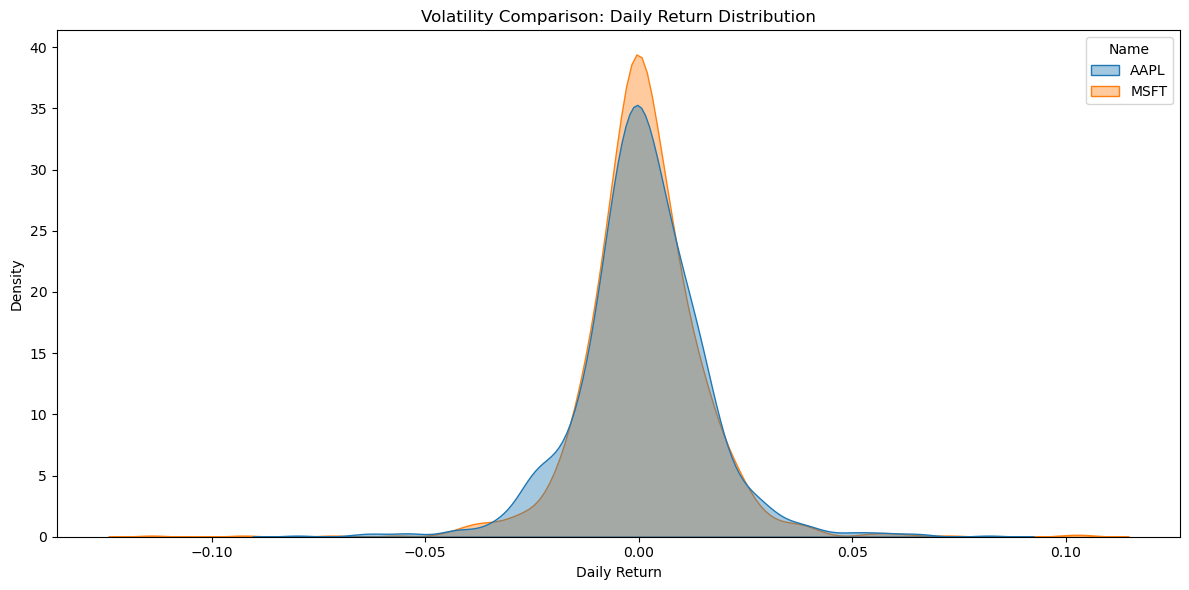

In [28]:
# --- 7. Volatility Comparison (Daily Returns) ---
df_selected = df[df['Name'].isin(selected_companies)].copy()
df_selected.sort_values(['Name', 'date'], inplace=True)
df_selected['Daily Return'] = df_selected.groupby('Name')['close'].pct_change()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_selected, x='Daily Return', hue='Name', fill=True, common_norm=False, alpha=0.4)
plt.title('Volatility Comparison: Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Data Modelling

In [29]:
# ---------- Feature Selection ----------
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

In [30]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# ---------- Train Models ----------
models = {
    "Linear Regression": LinearRegression(),
    "SVM": LinearSVR(random_state=42, max_iter=5000),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    "HistGradient": HistGradientBoostingRegressor(random_state=42)
}

results = {}

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")


Linear Regression Results:
MAE: 0.2689
MSE: 0.1668
RMSE: 0.4084
R2: 0.9999

SVM Results:
MAE: 0.2773
MSE: 0.1728
RMSE: 0.4157
R2: 0.9999

Random Forest Results:
MAE: 0.2766
MSE: 0.1839
RMSE: 0.4289
R2: 0.9999

HistGradient Results:
MAE: 0.3521
MSE: 0.2744
RMSE: 0.5238
R2: 0.9998


In [35]:
# ---------- Best Model ----------
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"\n The best performing model is: {best_model} with R2 = {results[best_model]['R2']:.4f}")


 The best performing model is: Linear Regression with R2 = 0.9999
